### Resolución de Ejercicio 1 TP1
#### Generador de secuencias al azar (ADN y proteína)

In [1]:
import pandas as pd
import numpy as np
import plotly
import matplotlib.pyplot as plt
import Bio
import random
from Bio import SeqIO
from Bio.SeqRecord import SeqRecord
from collections import Counter
from matplotlib import cm


1: IWDNWTVNPIKEDWPPSSHQKFSYLVHNNVSQKGPGFILKPFMYAWWRCAADNKHGGWLHGKNNEVGYCHCKGPPVQGPPLVTGWCPESTGMQIYPHNYL
2: IRQHMICSQHWNNGGETYNPSTWFQIWQHHGKHNERHSWVTSYLTALDQPSNWQACGTKMVTFFIEIHWQIHAHQLCTGEGQCDIMTYHKHYVRSKLEDR
3: PEEGVKVDSVCMKWDDTDFCSYPQIKGGHPIQYHWVNRAEMLLNHYQTNCCIYAANAFFCWIWQEPTMWSYREMPLSAPPQAYHNLDQTGPQATPFTPLG
4: FFYQWTQWAFGMGNQSVAADQITQFPYCMYKPSNMFIVMARVFHCHLFYENMCDSQNDKGTFYKVQGFCAKAHITWLNGTMSPFEIGYDVVWPPDTQVDN
5: NQEWWTPSWFRQHPAQHTCYSYRQVFCCIGDYTRSTACVIHVYTSFAQEDLNKHAYDFWMYPHWLIFCQCPFIMTCRGCQAWKTQNFVWRIMIAYLRNRC
6: EHLYRGRGGSLWRWAYAWMMSSCGGMDQAVCGLHKFCCTQPDCAWLTDTAYTHHIHRLCLQTFTAWTGTVNIDKSDHCTLHSCWEVLGMPQMVNQALRND
7: KLYHCNLCREAVWQYGGRFLKMRTERDFSWIPVTTCSWQNVAKARYQEHMNMLMQFARRNIDRQFFEMRIIFALDWCATIIGWGTAMEVCNLERIRSIFV
8: MHQKWDGSTIFFPHYCSHGMSELSTLNRDSNFYPIIDMSQGIICWDMTRRNCAYRSWDWDFYDAIREDPGWAVLCMRGTHCVMNALIHLQCAWKARDQYR
9: NTMPNAEGLQKHGMTNFPADWDAYSVWTCHAPKMYWPWVYMFDTPCWKQVQKKGNNRVITDTDSGRGPTGLVMTWWCPGTNSWQINEKFIRSIFPLGDPP
10: VEYQWTHPPTYRKLCCDNFDKARNNHRNVQMVRVKCIPDLNAQWRWPPYTPIYIFFVMDD

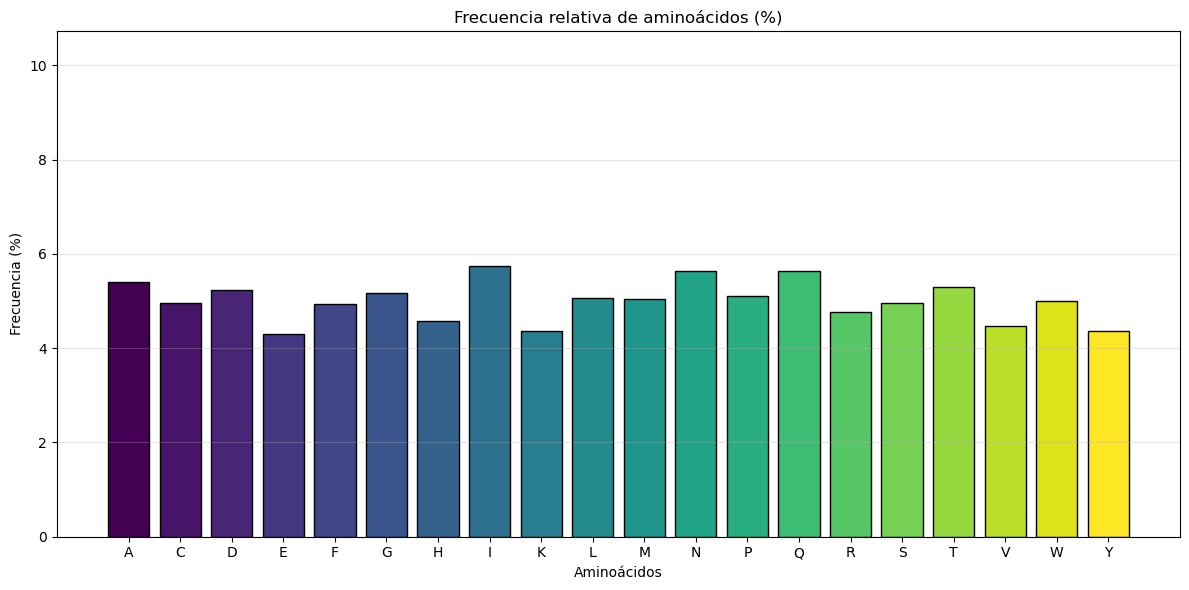

In [2]:
# ----- Bloque 1: Función para guardar secuencias en formato FASTA -----
def save_fasta(sequences, seq_type, file_name="secuencias.fasta"):
    """
    Save a list of FASTA format sequences in a file
    """
    with open(file_name, "w") as file:
        for i, sequence in enumerate(sequences):
            file.write(f">Sequence_{i+1} | Type: {seq_type}\n")
            file.write(f"{sequence}\n")

# ----- Bloque 2: Funciones para el análisis de DNAseq ------
# --- Bloque 2A: Función para análisis de contenido GC en DNAseq ---
def calculate_GC(sequence):
    """ Caculate the content of GC of DNA sequences
    """
    if not sequence:
        return 0.0
    total_long = len(sequence)
    GC_count = int(sequence.count("G") + sequence.count("C"))
    return round(float((GC_count/total_long)*100), 2)


# --- Bloque 2B: Función para graficar un histograma de contenido GC de secuencias de ADN ---
def plot_gc_histogram(gc_contents):
    """
    Create and show a %GC content histogram of DNA sequences
    """
    plt.figure(figsize=(10, 6))
    plt.hist(gc_contents, bins=20, edgecolor="black", alpha=0.7)
    plt.title("GC content distribution in DNA seqs")
    plt.xlabel("GC content (%)")
    plt.ylabel("Number of sequences")
    plt.grid(axis="y", alpha=0.75)
    plt.show()


# --- Bloque 2C: Analiza el archivo FASTA para calcular contenido GC ---
def DNA_analysis(file_name):
    """ Analize FASTA file to caculate the GC content
    """
    print("\n Iniciando análisis contenido GC: ")
    gc_contents_list = []
    try:
#se abre el archivo y se analiza con SeqIO
        with open (file_name, "r") as handle:
            for record in SeqIO.parse(handle, "fasta"):
                seq_id =record.id
                sequence = str(record.seq)
#se verifica que sea una secuencia de ADN
                if all(base in "ATGC" for base in sequence):
                    gc_content = calculate_GC(sequence)
                    gc_contents_list.append(gc_content)
                    print(f"{"Sequence ID"}: {seq_id}")
                    print(f"{"GC content"}: {gc_content:2f}%")
                else:
                    print(f"{"Sequence ID"}: {seq_id} Is not a DNA sequence")
#Llama a la función para graficar el contenido GC
        if gc_contents_list:
            plot_gc_histogram(gc_contents_list)
    except FileNotFoundError:
        print(f" Error: File {file_fasta} is not found. First generate the DNA sequences to analyze")
    except Exception as e:
        print(f"An unexpected error has ocurred during the analysis: {e}")


# --- Bloque 2D: Genera la secuencia complementaria, la reversa complementaria, transcribe y traduce
def DNA_traduction(file_name, output_file):
    """ Analize FASTA file to generates the complementary sequence, the complementary reverse, transcribes
    and translates
    """
    print("\nIniciando análisis de trascripción y traducción: ")
    seqs_to_save = []
    try:
#se abre el archivo y se analiza con SeqIO
        with open (file_name, "r") as handle:
            for record in SeqIO.parse(handle, "fasta"):
                seq_id =record.id
                sequence = record.seq
#se verifica que sea una secuencia de ADN
                if all(base in "ATGC" for base in sequence):
#Se genera la secuencia complementaria, la reversa complementaria, se transcribe y traduce
                    complement_seq = sequence.complement()
                    reverse_compl_seq =sequence.reverse_complement()
                    transc_seq = sequence.transcribe()
                    translate_seq = sequence.translate()
                    print(f"\nSecuencia ID: {seq_id}")
                    print(f"\nSecuencia complementaria: {complement_seq}")
                    print(f"\nSecuencia reversa complementaria: {reverse_compl_seq}")
                    print(f"\nSecuencia transcrita (ARN): {transc_seq}")
                    print(f"\nSecuencia traducida (proteína): {translate_seq}")
                    seqs_to_save.append(SeqRecord(sequence, id=f"{seq_id}_sequence", description="Secuencia generada"))
                    seqs_to_save.append(SeqRecord(complement_seq, id=f"{seq_id}_complement", description="Secuencia complementaria"))
                    seqs_to_save.append(SeqRecord(reverse_compl_seq, id=f"{seq_id}_revcomp", description="Reversa complementaria"))
                    seqs_to_save.append(SeqRecord(transc_seq, id=f"{seq_id}_rna", description="ARN transcrito"))
                    seqs_to_save.append(SeqRecord(translate_seq, id=f"{seq_id}_protein", description="Proteína traducida"))
                else:
                    print(f"\nSequence ID: {seq_id} Is not a DNA sequence")
        if seqs_to_save:
            SeqIO.write(seqs_to_save, output_file, "fasta")
            print(f"\nTodas las secuencias procesadas fueron guardadas en: {output_file}")
        else:
            print("\nNo se generaron secuencias para guardar.")
    except FileNotFoundError:
        print(f" Error: File {file_name} is not found. First generate the DNA sequences to analyze")
    except Exception as e:
        print(f"An unexpected error has ocurred during the analysis: {e}")


# ----- Bloque 3 Funciones para el análisis de secuencias de proteina -----
#  --- Bloque 3A: Función para graficar un histograma de frecuencia de aa de secuencias de proteina ---
def plot_aa_bar_chart(aa_counts):
    """
    Grafica la frecuencia relativa de aminoácidos (%), en orden alfabético.
    """
    amino_acids = sorted(aa_counts.keys())
    total = sum(aa_counts.values())
    frequencies = [(aa_counts[aa] / total) * 100 for aa in amino_acids]

    n = len(amino_acids)
    colors = cm.viridis(np.linspace(0, 1, n))

    plt.figure(figsize=(12, 6))
    bars = plt.bar(amino_acids, frequencies, color=colors, edgecolor="black")
    plt.title("Frecuencia relativa de aminoácidos (%)")
    plt.xlabel("Aminoácidos")
    plt.ylabel("Frecuencia (%)")
    plt.ylim(0, max(frequencies) + 5)
    plt.grid(axis="y", alpha=0.3)
    plt.tight_layout()
    plt.show()

#--- Bloque 3B: Función principal para análisis de aa de secuencias de proteina ---
def protein_analysis(file_name):
    """
    Analiza un archivo FASTA de proteínas y grafica la frecuencia relativa de aminoácidos.
    """
    print("\nIniciando análisis de aminoácidos:")
    total_aa_counts = Counter()

    try:
        with open(file_name, "r") as handle:
            for record in SeqIO.parse(handle, "fasta"):
                seq_id = record.id
                sequence = str(record.seq).upper()
                if all(base in "ARNDCQEGHILKMFPSTWYV" for base in sequence):
                    total_aa_counts.update(sequence)
                    print(f"Secuencia analizada: {seq_id}")
                    print("-" * 30)
                else:
                    print(f"Sequence ID: {seq_id} no es una secuencia válida de proteína")
                    print("-" * 30)
        if total_aa_counts:
            plot_aa_bar_chart(total_aa_counts)
        else:
            print("No se encontraron secuencias válidas de proteína en el archivo.")
    except FileNotFoundError:
        print(f"Error: No se encontró el archivo '{file_name}'.")
    except Exception as e:
        print(f"Ha ocurrido un error inesperado durante el análisis: {e}")

# ----- Bloque 4: Programa generador de secuencias al azar -----
def run():
    menu="""
    Welcome to the random sequences generator
    1- DNA sequences
    2- Protein sequences
    Pick up an option: """

    try:
        option = int(input(menu))
        if option == 1:
            long_DNAseq = int(input("How long do you want the DNA sequences?: "))
            num_DNAseqs = int(input("How many sequences do you want?: "))
            my_DNA_nc = ["A", "C", "G", "T"]
            generated_sequences = []
            for i in range(num_DNAseqs):
                sequence = ''.join(random.choices(my_DNA_nc, k=long_DNAseq))
                generated_sequences.append(sequence)
                print(f"{i+1}: {sequence}")
            save_fasta(generated_sequences, "ADN")
            print("\nDNA sequences have been saved in file 'secuencias.fasta'")
            DNA_analysis("secuencias.fasta")
            DNA_traduction("secuencias.fasta","secuencias_traducidas.fasta")
        elif option == 2:
            long_seq_prot = int(input("How long do you want the protein sequences: "))
            num_seqs_prot = int(input("How many sequences do you want?: "))
            my_aa = ["A", "R", "N", "D", "C", "Q", "E", "G", "H", "I", "L", "K", "M", "F", "P", "S", "T", "W", "Y", "V"]
            generated_sequences = []
            for i in range(num_seqs_prot):
                sequence = ''.join(random.choices(my_aa, k=long_seq_prot))
                generated_sequences.append(sequence)
                print(f"{i+1}: {sequence}")
            save_fasta(generated_sequences, "Protein")
            print("\nProtein sequences have been saved in file 'secuencias.fasta'")
            protein_analysis("secuencias.fasta")
        else:
            print("Pick up a correct option (1 or 2)")
    except ValueError:
        print("Invalid input. Please enter a number.")


if __name__ == '__main__':
    run()